## Importing the Packages

In [18]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Importing the Data

In [19]:
raw_data = yfinance.download (tickers = "VOW3.DE, PAH3.DE, BMW.DE", interval = "1d", group_by = 'ticker',
                              auto_adjust = True, treads = True)

[*********************100%***********************]  3 of 3 completed


In [20]:
df=raw_data.copy()

## Defining Key Dates

In [21]:
# Starting Date
start_date='2009-04-05'

# First Official Announcement - 49.9%
ann_1='2009-12-09'

# Second Official Announcement - 51.1%
ann_2='2012-07-05'

#Ending Date
end_date='2014-01-01'

# Dieselgate
d_gate='2015-09-20'

## Pre-processing the Data

In [22]:
# Extracting Closing Prices
df['vol']=df['VOW3.DE'].Close
df['por']=df['PAH3.DE'].Close
df['bmw']=df['BMW.DE'].Close

# Creating Returns
df['ret_vol']=df['vol'].pct_change(1).mul(100)
df['ret_por']=df['por'].pct_change(1).mul(100)
df['ret_bmw']=df['bmw'].pct_change(1).mul(100)

# Creating Squared Returns
df['sq_vol']=df['ret_vol'].mul(df['ret_vol'])
df['sq_por']=df['ret_por'].mul(df['ret_por'])
df['sq_bmw']=df['ret_bmw'].mul(df['ret_bmw'])

# Extracting Volume
df['q_vol']=df['VOW3.DE'].Volume
df['q_por']=df['PAH3.DE'].Volume
df['q_bmw']=df['BMW.DE'].Volume

In [23]:
# Assigning the Frequency and Filling NA Values
df=df.asfreq('b')
df=df.fillna(method='bfill')

In [24]:
# Removing Surplus Data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

## Plotting the Prices

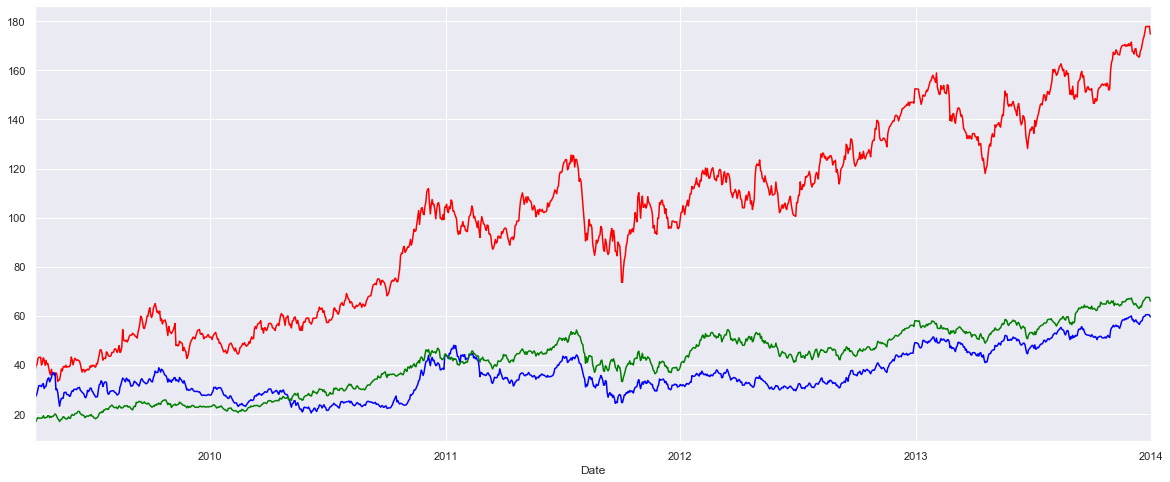

In [26]:
df['vol'][start_date:end_date].plot(figsize=(20,8),color='red')
df['por'][start_date:end_date].plot(figsize=(20,8),color='blue')
df['bmw'][start_date:end_date].plot(figsize=(20,8),color='green')
plt.show()

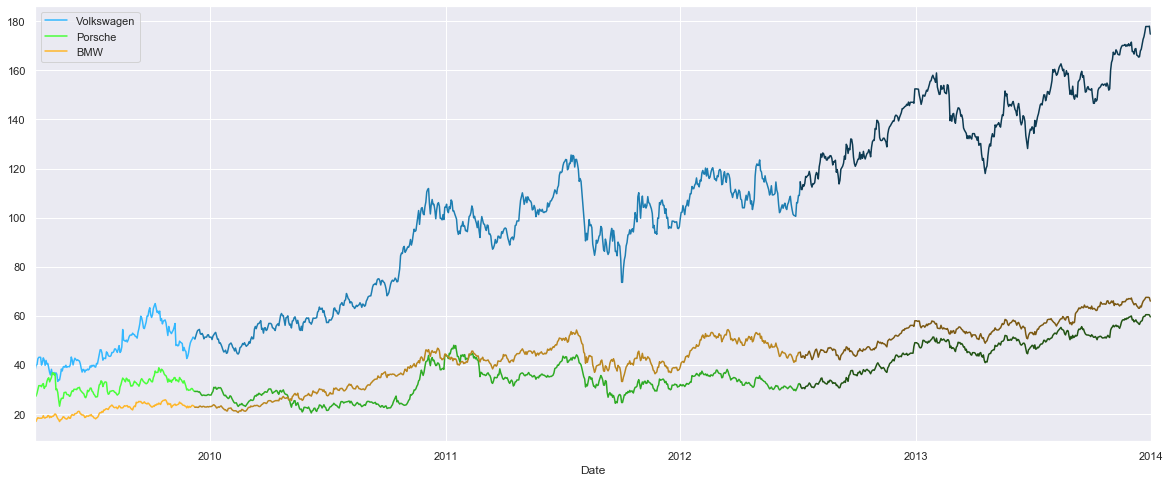

In [28]:
#color = "#33B8FF"
#color = "#49FF3A"
#color = "#FEB628"

#color = "#1E7EB2"
#color = "#2FAB25"
#color = "#BA861F"

#color = "#0E3A52"
#color = "#225414"
#color = "#7C5913"

df['vol'][start_date:ann_1].plot(figsize=(20,8),color='#33B8FF')
df['por'][start_date:ann_1].plot(figsize=(20,8),color='#49FF3A')
df['bmw'][start_date:ann_1].plot(figsize=(20,8),color='#FEB628')

df['vol'][ann_1:ann_2].plot(figsize=(20,8),color='#1E7EB2')
df['por'][ann_1:ann_2].plot(figsize=(20,8),color='#2FAB25')
df['bmw'][ann_1:ann_2].plot(figsize=(20,8),color='#BA861F')

df['vol'][ann_2:end_date].plot(figsize=(20,8),color='#0E3A52')
df['por'][ann_2:end_date].plot(figsize=(20,8),color='#225414')
df['bmw'][ann_2:end_date].plot(figsize=(20,8),color='#7C5913')

plt.legend(['Volkswagen','Porsche','BMW'])
plt.show()


## Correlation

In [30]:
print('Correlation among manufacturers from '+str(start_date)+' to '+str(end_date)+'\n')
print('Volkswagen and Porsche correlation: \t'+str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen and BMW correlation: \t'+str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('BMW and Porsche correlation: \t\t'+str(df['bmw'][start_date:end_date].corr(df['por'][start_date:end_date])))

Correlation among manufacturers from 2009-04-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.8348049992443258
Volkswagen and BMW correlation: 	0.9799384511501866
BMW and Porsche correlation: 		0.8039398481425042


In [31]:
print('Correlation among manufacturers from '+str(start_date)+' to '+str(ann_1)+'\n')
print('Volkswagen and Porsche correlation: \t'+str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen and BMW correlation: \t'+str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('BMW and Porsche correlation: \t\t'+str(df['bmw'][start_date:ann_1].corr(df['por'][start_date:ann_1])))

Correlation among manufacturers from 2009-04-05 to 2009-12-09

Volkswagen and Porsche correlation: 	0.6633400188255092
Volkswagen and BMW correlation: 	0.8428353250592515
BMW and Porsche correlation: 		0.6095045440130231


In [32]:
print('Correlation among manufacturers from '+str(ann_1)+' to '+str(ann_2)+'\n')
print('Volkswagen and Porsche correlation: \t'+str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen and BMW correlation: \t'+str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('BMW and Porsche correlation: \t\t'+str(df['bmw'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))

Correlation among manufacturers from 2009-12-09 to 2012-07-05

Volkswagen and Porsche correlation: 	0.7422114416818718
Volkswagen and BMW correlation: 	0.9795942983809948
BMW and Porsche correlation: 		0.7035985466970391


In [33]:
print('Correlation among manufacturers from '+str(ann_2)+' to '+str(end_date)+'\n')
print('Volkswagen and Porsche correlation: \t'+str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))
print('Volkswagen and BMW correlation: \t'+str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))
print('BMW and Porsche correlation: \t\t'+str(df['bmw'][ann_2:end_date].corr(df['por'][ann_2:end_date])))

Correlation among manufacturers from 2012-07-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.940523682066474
Volkswagen and BMW correlation: 	0.9284447102983764
BMW and Porsche correlation: 		0.9494111676682194


In [34]:
print('Correlation among manufacturers from '+str(end_date)+' to '+str(df.index[-1])+'\n')
print('Volkswagen and Porsche correlation: \t'+str(df['vol'][end_date:].corr(df['por'][end_date:])))
print('Volkswagen and BMW correlation: \t'+str(df['vol'][end_date:].corr(df['bmw'][end_date:])))
print('BMW and Porsche correlation: \t\t'+str(df['bmw'][end_date:].corr(df['por'][end_date:])))

Correlation among manufacturers from 2014-01-01 to 2020-03-31 00:00:00

Volkswagen and Porsche correlation: 	0.9460395971797786
Volkswagen and BMW correlation: 	0.5220330407825118
BMW and Porsche correlation: 		0.4846768444065256


## Best Fitting Models

### For Volkswagen

In [35]:
mod_pr_pre_vol=auto_arima(df.vol[start_date:ann_1],exogenus=df[['por','bmw']][start_date:ann_1],
                          m=5,max_p=5,max_q=5)
mod_pr_btn_vol=auto_arima(df.vol[ann_1:ann_2],exogenus=df[['por','bmw']][ann_1:ann_2],
                          m=5,max_p=5,max_q=5)
mod_pr_post_vol=auto_arima(df.vol[ann_2:end_date],exogenus=df[['por','bmw']][ann_2:end_date],
                          m=5,max_p=5,max_q=5)

In [36]:
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -333.748
Date:                Tue, 31 Mar 2020   AIC                            679.496
Time:                        19:40:41   BIC                            698.553
Sample:                             0   HQIC                           687.225
                                - 178                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0383      0.052      0.734      0.463      -0.064       0.140
ar.L1          1.5536      0.027     58.007      0.000       1.501       1.606
ar.L2         -0.9874      0.027    -36.725      0.000      -1.040      -0.935
ma.L1         -1.5912      0.128    -12.393      0.000      -1.843      -1.340
ma.L2          0.9884      0.166      5.965      0.000       0.664       1.313
sigma2         2.4886      0.419      5.942      0.000       1.668       3.309
===================================================================================
Ljung-Box (Q):                       21.74   Jarque-Bera (JB):               159.56
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                            -0.55
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
mod_pr_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1478.147
Date:                Tue, 31 Mar 2020   AIC                           2962.295
Time:                        19:40:42   BIC                           2975.821
Sample:                             0   HQIC                          2967.534
                                - 672                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0963      0.094      1.021      0.307      -0.089       0.281
ma.L1          0.0885      0.035      2.558      0.011       0.021       0.156
sigma2         4.7966      0.192     24.922      0.000       4.419       5.174
===================================================================================
Ljung-Box (Q):                       61.26   Jarque-Bera (JB):                85.37
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               5.57   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
mod_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  390
Model:             SARIMAX(0, 1, 0)x(1, 0, 1, 5)   Log Likelihood                -839.539
Date:                           Tue, 31 Mar 2020   AIC                           1687.079
Time:                                   19:40:43   BIC                           1702.933
Sample:                                        0   HQIC                          1693.364
                                           - 390                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0081      0.009      0.899      0.369      -0.010       0.026
ar.S.L5        0.9424      0.061     15.501      0.000       0.823       1.062
ma.S.L5       -0.9985      0.540     -1.848      0.065      -2.058       0.061
sigma2         4.3253      2.171      1.992      0.046       0.071       8.580
===================================================================================
Ljung-Box (Q):                       25.83   Jarque-Bera (JB):                50.51
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.22
Prob(H) (two-sided):                  0.66   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### For Porsche

In [39]:
mod_pr_pre_por=auto_arima(df.por[start_date:ann_1],exogenus=df[['vol','bmw']][start_date:ann_1],
                          m=5,max_p=5,max_q=5)
mod_pr_btn_por=auto_arima(df.por[ann_1:ann_2],exogenus=df[['vol','bmw']][ann_1:ann_2],
                          m=5,max_p=5,max_q=5)
mod_pr_post_por=auto_arima(df.por[ann_2:end_date],exogenus=df[['vol','bmw']][ann_2:end_date],
                          m=5,max_p=5,max_q=5)

In [42]:
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -270.083
Date:                Tue, 31 Mar 2020   AIC                            542.166
Time:                        19:43:08   BIC                            545.342
Sample:                             0   HQIC                           543.454
                                - 178                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2385      0.065     19.004      0.000       1.111       1.366
===================================================================================
Ljung-Box (Q):                       45.75   Jarque-Bera (JB):               319.80
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
mod_pr_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -877.008
Date:                Tue, 31 Mar 2020   AIC                           1760.015
Time:                        19:43:07   BIC                           1773.542
Sample:                             0   HQIC                          1765.254
                                - 672                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0041      0.039      0.106      0.916      -0.072       0.081
ma.L1          0.1096      0.032      3.398      0.001       0.046       0.173
sigma2         0.7994      0.025     31.987      0.000       0.750       0.848
===================================================================================
Ljung-Box (Q):                       45.78   Jarque-Bera (JB):               483.41
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -448.256
Date:                Tue, 31 Mar 2020   AIC                            900.511
Time:                        19:43:13   BIC                            908.439
Sample:                             0   HQIC                           903.654
                                - 390                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0710      0.039      1.824      0.068      -0.005       0.147
sigma2         0.5867      0.033     17.659      0.000       0.522       0.652
===================================================================================
Ljung-Box (Q):                       23.77   Jarque-Bera (JB):                25.52
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.14
Prob(H) (two-sided):                  0.97   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions for the Future

### For Porsche

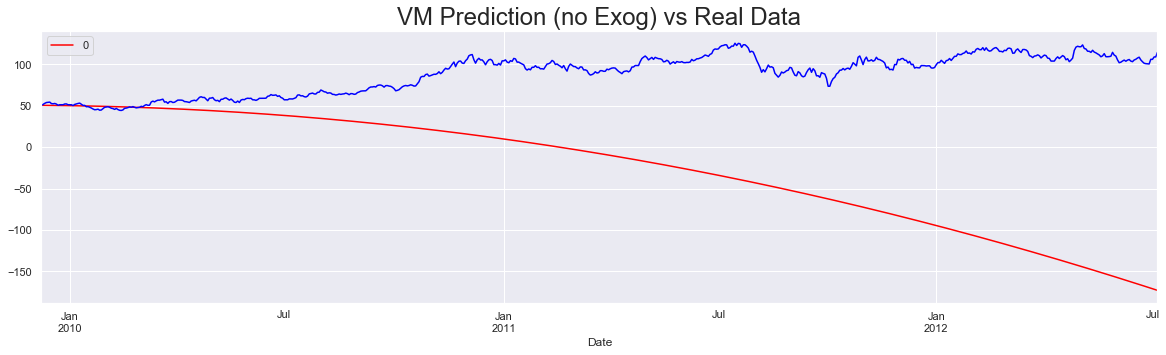

In [44]:
model_auto_pred_pr=auto_arima(df.vol[start_date:ann_1],m=5,max_p=5,max_q=5,max_P=5,max_Q=5,trend='ct')

df_auto_pred_pr=pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2])),index=df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20,5),color='red')

df.vol[ann_1:ann_2].plot(color='blue')
plt.title('VM Prediction (no Exog) vs Real Data',size=24)
plt.show()

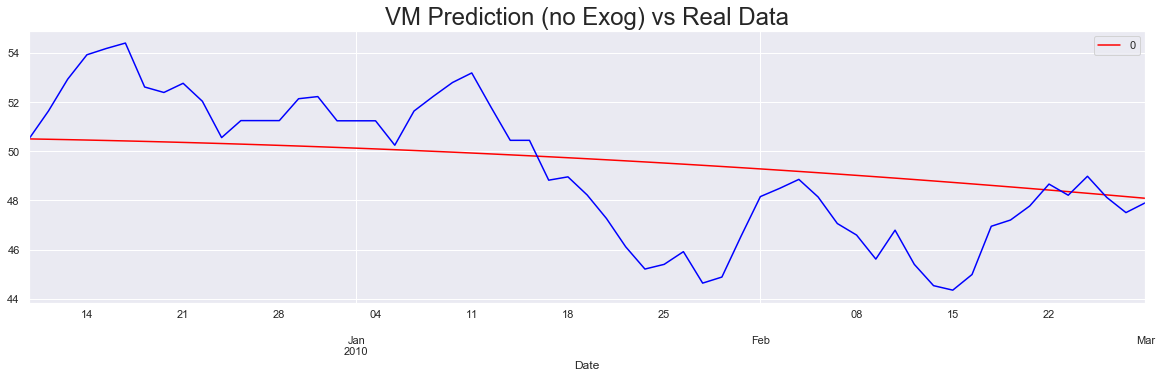

In [45]:
df_auto_pred_pr[ann_1:'2010-03-01'].plot(figsize=(20,5),color='red')
df.vol[ann_1:'2010-03-01'].plot(color='blue')
plt.title('VM Prediction (no Exog) vs Real Data',size=24)
plt.show()

### For Volkswagen

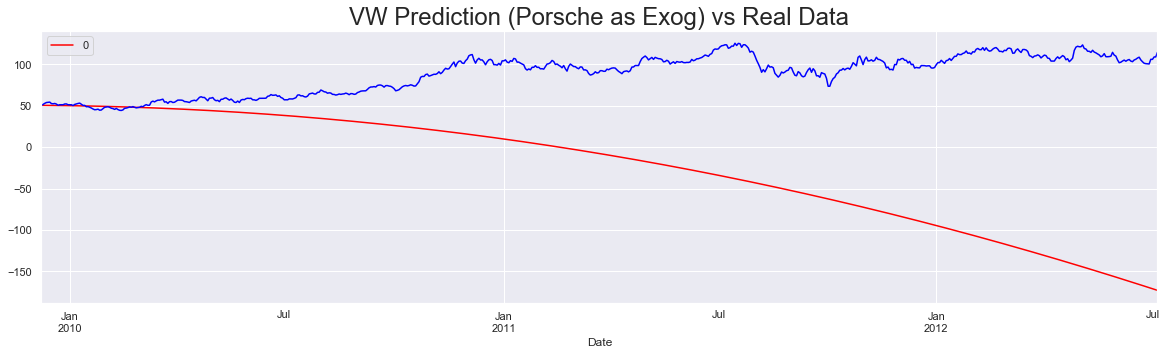

In [48]:
model_auto_pred_pr=auto_arima(df.vol[start_date:ann_1],exogenous=df[['por']][start_date:ann_1],
                             m=5,max_p=5,max_q=5,max_P=5,max_Q=5,trend='ct')

df_auto_pred_pr-pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2]),exogenous=df[['por']][ann_1:ann_2]),
                            index=df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20,5),color='red')

df.vol[ann_1:ann_2].plot(color='blue')
plt.title('VW Prediction (Porsche as Exog) vs Real Data',size=24)
plt.show()

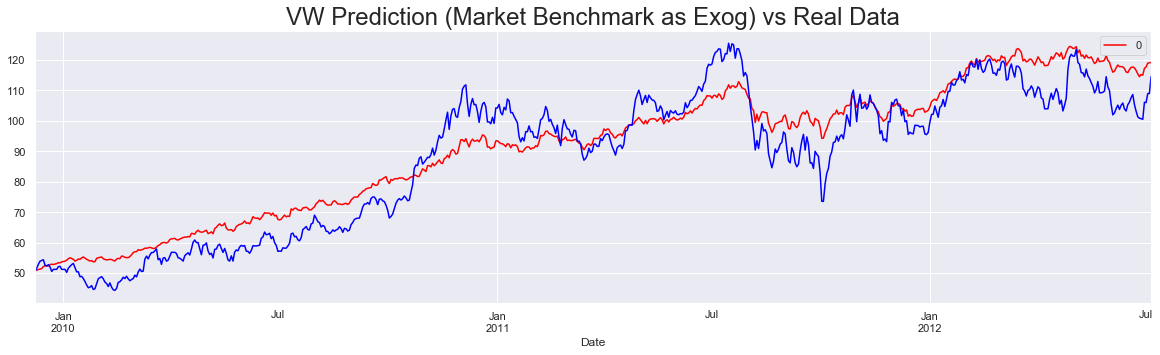

In [50]:
model_auto_pred_pr=auto_arima(df.vol[start_date:ann_1],exogenous=df[['bmw']][start_date:ann_1],
                             m=5,max_p=5,max_q=5,max_P=5,max_Q=5,trend='ct')

df_auto_pred_pr=pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2]),exogenous=df[['bmw']][ann_1:ann_2]),
                            index=df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20,5),color='red')

df.vol[ann_1:ann_2].plot(color='blue')
plt.title('VW Prediction (Market Benchmark as Exog) vs Real Data',size=24)
plt.show()

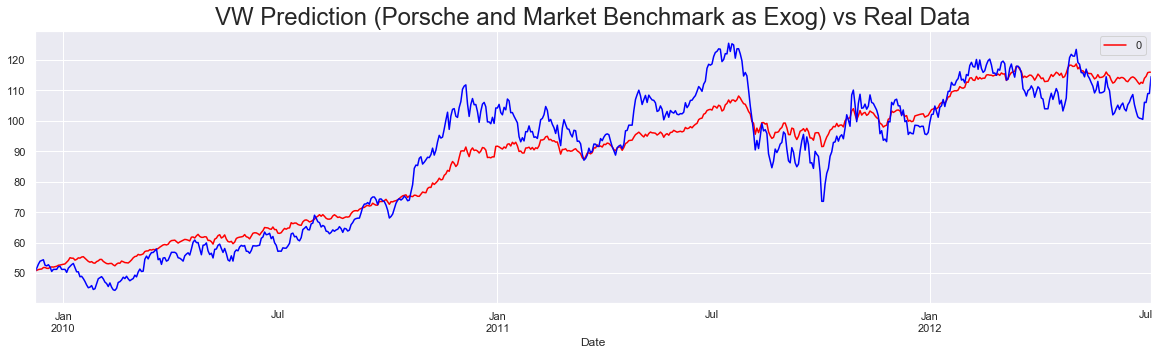

In [51]:
model_auto_pred_pr=auto_arima(df.vol[start_date:ann_1],exogenous=df[['por','bmw']][start_date:ann_1],
                             m=5,max_p=5,max_q=5,max_P=5,max_Q=5,trend='ct')

df_auto_pred_pr=pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2]),exogenous=df[['por','bmw']][ann_1:ann_2]),
                            index=df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20,5),color='red')

df.vol[ann_1:ann_2].plot(color='blue')
plt.title('VW Prediction (Porsche and Market Benchmark as Exog) vs Real Data',size=24)
plt.show()

## Volatility

### Volatility of VW for Each Period

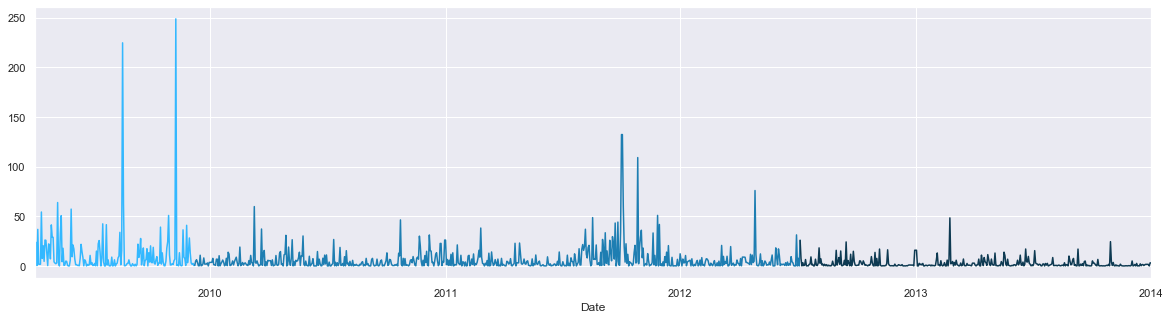

In [52]:
df['sq_vol'][start_date:ann_1].plot(figsize=(20,5),color='#33B8FF')
df['sq_vol'][ann_1:ann_2].plot(figsize=(20,5),color='#1E7EB2')
df['sq_vol'][ann_2:end_date].plot(figsize=(20,5),color='#0E3A52')
plt.show()

### Volatility Trends for Each Period

In [53]:
model_garch_pre=arch_model(df.ret_vol[start_date:ann_1],mean='Constant',vol='GARCH',p=1,q=1)
results_garch_pre=model_garch_pre.fit(update_freq=5)

model_garch_btn=arch_model(df.ret_vol[ann_1:ann_2],mean='Constant',vol='GARCH',p=1,q=1)
results_garch_btn=model_garch_btn.fit(update_freq=5)

model_garch_post=arch_model(df.ret_vol[ann_2:end_date],mean='Constant',vol='GARCH',p=1,q=1)
results_garch_post=model_garch_post.fit(update_freq=5)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 475.81064739603244
Iteration:     10,   Func. Count:     65,   Neg. LLF: 475.0302928369562
Iteration:     15,   Func. Count:     95,   Neg. LLF: 474.9915210148083
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 474.99152096250384
            Iterations: 15
            Function evaluations: 95
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1526.9228402592855
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1526.7316954368935
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1526.7316954356486
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     38,   Neg. LLF: 724.5620364427224
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 724.5578157320635
            Iterations: 7
        

In [54]:
results_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -474.992
Distribution:                  Normal   AIC:                           957.983
Method:            Maximum Likelihood   BIC:                           970.710
                                        No. Observations:                  178
Date:                Tue, Mar 31 2020   Df Residuals:                      174
Time:                        20:11:35   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1571      0.266      0.590      0.556 [ -0.365,  0.679]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.6195      4.227      2.512  1.200e-02    [  2.334, 18.905]
alpha[1]       0.1540  9.197e-02      1.675  9.401e-02 [-2.624e-02,  0.334]
beta[1]    1.2037e-12      0.349  3.447e-12      1.000    [ -0.684,  0.684]
===========================================================================

Covariance estimator: robust
"""

In [55]:
results_garch_btn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.73
Distribution:                  Normal   AIC:                           3061.46
Method:            Maximum Likelihood   BIC:                           3079.50
                                        No. Observations:                  672
Date:                Tue, Mar 31 2020   Df Residuals:                      668
Time:                        20:11:35   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1892  8.634e-02      2.191  2.843e-02 [1.998e-02,  0.358]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1679  7.914e-02      2.122  3.388e-02 [1.279e-02,  0.323]
alpha[1]       0.0688  1.682e-02      4.091  4.301e-05 [3.585e-02,  0.102]
beta[1]        0.9040  2.108e-02     42.883      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""

In [56]:
results_garch_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -724.558
Distribution:                  Normal   AIC:                           1457.12
Method:            Maximum Likelihood   BIC:                           1472.98
                                        No. Observations:                  390
Date:                Tue, Mar 31 2020   Df Residuals:                      386
Time:                        20:11:35   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2298  9.845e-02      2.334  1.958e-02 [3.685e-02,  0.423]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7719      0.677      1.141      0.254    [ -0.554,  2.098]
alpha[1]       0.1853      0.145      1.273      0.203 [-9.991e-02,  0.470]
beta[1]        0.5136      0.331      1.550      0.121    [ -0.136,  1.163]
===========================================================================

Covariance estimator: robust
"""